In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# used for synthetizing the datasets
import random
import time
import os
import math
%matplotlib inline

# This is the preprocessing part + synthetization of the dataset

### This is only the pre-processing part for the recommendation system's dataset as python is more convienient in this case than CSharp

### The dataset used for this project is the most suitable for the needs of this project - searches have been done and this is the only one that has been found that would satisfy the project's needs this one will be used for the sake of time

In [17]:
cols = ['Invoice', 'StockCode', 'title', 'quantity', 'InvoiceDate', 'price', 'userID', "Country"]
df = pd.read_excel("online_retail_II.xlsx", header = 0, names = cols)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   title        522533 non-null  object        
 3   quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   price        525461 non-null  float64       
 6   userID       417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [19]:
df.head()

,Invoice,StockCode,title,quantity,InvoiceDate,price,userID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [20]:
# drop the columns not needed 
df.drop(["Invoice", "StockCode", "InvoiceDate", "Country"], axis = 1, inplace = True)

In [21]:
# changes
df.head()

,title,quantity,price,userID
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0
1,PINK CHERRY LIGHTS,12,6.75,13085.0
2,WHITE CHERRY LIGHTS,12,6.75,13085.0
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0


In [22]:
# check for na values
checkNa = df.isna().sum()
checkNa

title         2928
quantity         0
price            0
userID      107927
dtype: int64

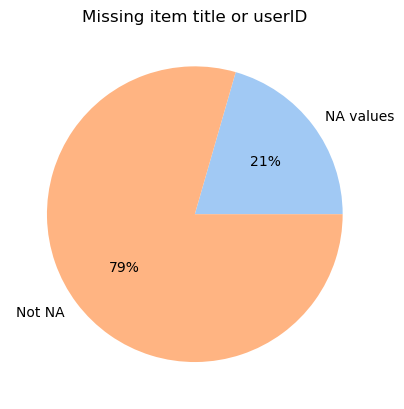

In [23]:
# obviously missing values from the title are part of the total of missing values of userID, i.e., both exist or not on a row
#define data
totalNa  = (checkNa["userID"] / len(df.index)) * 100
remaining = 100 - totalNa
data = [totalNa, remaining]
labels = ["NA values", "Not NA"]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

# create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Missing item title or userID")
plt.show()

In [24]:
# drop these values
df.dropna(inplace = True)
df.isna().sum()

title       0
quantity    0
price       0
userID      0
dtype: int64

In [25]:
# remaining entries
len(df.index)

417534

In [26]:
# reset indexing of rows for avoiding future errors after dropping columns
df.reset_index(drop = True, inplace = True)
df.head()

,title,quantity,price,userID
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0
1,PINK CHERRY LIGHTS,12,6.75,13085.0
2,WHITE CHERRY LIGHTS,12,6.75,13085.0
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0


In [27]:
# the user id in the databae will be autoincremented so it only needs to be unique
# so it will be auto incremented in this dataset as well
userIDs = []
dictUserIds = dict(zip(list(df["userID"].unique()), list(range(0, len(df["userID"].unique())))))
for index, row in df.iterrows():
    userIDs.append(dictUserIds[row["userID"]])

In [28]:
# replace the old id columns with the new one
df.drop(["userID"], axis=1, inplace = True)
df.head()

,title,quantity,price
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95
1,PINK CHERRY LIGHTS,12,6.75
2,WHITE CHERRY LIGHTS,12,6.75
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25


In [29]:
# insert the new one
df["userID"] = userIDs

In [30]:
df.head()

,title,quantity,price,userID
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,0
1,PINK CHERRY LIGHTS,12,6.75,0
2,WHITE CHERRY LIGHTS,12,6.75,0
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,0
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,0


In [37]:
# to obtain these datasets it can be separated into two datasets: one with the unique items from the current dataset and one with 
# the interactions of users with items
interactions = df
items = interactions.drop_duplicates(subset = ["title"])

In [38]:
# checking duplicated values
# duplicates will be not checked for now because this is a dataset with entries of products that the user bought
# for a recommendation system there is need of 2 datasets: one for item interactions from users and one with the items
items.duplicated().sum()

0

In [39]:
# so the number of unique items that users have interacted with is
len(items.index)

4459

In [40]:
# interactions of users dataset does not have any item details like price (arguable over the use as feature for 
# the recommendation process, store, quantity or rating
# price can actually be used as a factor for the recommendation process but that will be done later
# for now the item rating and price will be used

# for the items dataset is needed: itemID, store, title, unit_price
# for interactions dataset: itemID, userID, rating, quantity

In [41]:
# so items does not need userID
items = items.drop(["quantity", "userID"], axis = 1)
items.head()

,title,price
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95
1,PINK CHERRY LIGHTS,6.75
2,WHITE CHERRY LIGHTS,6.75
3,"RECORD FRAME 7"" SINGLE SIZE",2.10
4,STRAWBERRY CERAMIC TRINKET BOX,1.25


In [42]:
# now itemID wil be generated automatically : this is the synthetization process
# it will be just the index of the entries to not overthink it, it just needs to be unique
items["itemID"] = np.arange(items.shape[0])

In [43]:
# generated itemID column
items.head()

,title,price,itemID
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,0
1,PINK CHERRY LIGHTS,6.75,1
2,WHITE CHERRY LIGHTS,6.75,2
3,"RECORD FRAME 7"" SINGLE SIZE",2.10,3
4,STRAWBERRY CERAMIC TRINKET BOX,1.25,4


In [44]:
# lets synthetize the store column
# assuming that these items were bought from 5 different stores where these stores can sell the same item
stores = []
for i in range(len(items.index)):
    r = random.randint(0, 4)
    stores.append(r)

In [45]:
# append the column to the dataframe
items["storeID"] = stores

In [47]:
items.head(10)

,title,price,itemID,storeID
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95,0,2
1,PINK CHERRY LIGHTS,6.75,1,0
2,WHITE CHERRY LIGHTS,6.75,2,1
3,"RECORD FRAME 7"" SINGLE SIZE",2.10,3,0
4,STRAWBERRY CERAMIC TRINKET BOX,1.25,4,0
5,PINK DOUGHNUT TRINKET POT,1.65,5,3
6,SAVE THE PLANET MUG,1.25,6,2
7,FANCY FONT HOME SWEET HOME DOORMAT,5.95,7,1
8,CAT BOWL,2.55,8,3
9,"DOG BOWL , CHASING BALL DESIGN",3.75,9,4


In [48]:
# reset indexing of rows for avoiding future errors after dropping columns
items.reset_index(inplace = True)

In [49]:
# rearrange the columns
items = items[["itemID", "storeID", "title", "price"]]

In [50]:
items.head()

,itemID,storeID,title,price
0,0,2,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95
1,1,0,PINK CHERRY LIGHTS,6.75
2,2,1,WHITE CHERRY LIGHTS,6.75
3,3,0,"RECORD FRAME 7"" SINGLE SIZE",2.10
4,4,0,STRAWBERRY CERAMIC TRINKET BOX,1.25


In [51]:
# now the intearctions dataset will be modified and synthetized correspondingly
# for interactions dataset: itemID, userID, rating, quantity
interactions.head()

,title,quantity,price,userID
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,0
1,PINK CHERRY LIGHTS,12,6.75,0
2,WHITE CHERRY LIGHTS,12,6.75,0
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,0
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,0


In [52]:
# the itemID is needed in this dataset
itemID = []

# append all items' ID from the items dataframe to the interactions dataframe (there are also duplicates but that's because an
# item can have 1 > more interactions with an user)
dictItems = dict(zip(list(items["title"]), list(items["itemID"])))

for index, row in interactions.iterrows():
    itemID.append(dictItems[row["title"]])

In [53]:
# append the itemID column to the interactions column
interactions["itemID"] = itemID

In [54]:
interactions.head()

,title,quantity,price,userID,itemID
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,0,0
1,PINK CHERRY LIGHTS,12,6.75,0,1
2,WHITE CHERRY LIGHTS,12,6.75,0,2
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,0,3
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,0,4


In [55]:
# now there is just only one feature left: ratings
# a rating between 0.5 - 5.0 needs to be generated randomly / synthetized
rating = []
rating_range = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
for i in range(len(interactions.index)):
    r = random.randint(0, len(rating_range) - 1)
    rating.append(rating_range[r])

In [56]:
interactions["rating"] = rating

In [57]:
interactions.head()

,title,quantity,price,userID,itemID,rating
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,0,0,3.0
1,PINK CHERRY LIGHTS,12,6.75,0,1,0.5
2,WHITE CHERRY LIGHTS,12,6.75,0,2,0.5
3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,0,3,2.5
4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,0,4,2.5


In [58]:
# drop columns that are not needed in this dataframe as well
interactions.drop(["title", "price"], axis = 1, inplace = True)

In [59]:
interactions.head()

,quantity,userID,itemID,rating
0,12,0,0,3.0
1,12,0,1,0.5
2,12,0,2,0.5
3,48,0,3,2.5
4,24,0,4,2.5


In [61]:
# rearrange the columns
interactions = interactions[["itemID", "userID", "rating", "quantity"]]
interactions.head()

,itemID,userID,rating,quantity
0,0,0,3.0,12
1,1,0,0.5,12
2,2,0,0.5,12
3,3,0,2.5,48
4,4,0,2.5,24


In [62]:
# final datasets
items.head()

,itemID,storeID,title,price
0,0,2,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95
1,1,0,PINK CHERRY LIGHTS,6.75
2,2,1,WHITE CHERRY LIGHTS,6.75
3,3,0,"RECORD FRAME 7"" SINGLE SIZE",2.10
4,4,0,STRAWBERRY CERAMIC TRINKET BOX,1.25


In [63]:
interactions.head()

,itemID,userID,rating,quantity
0,0,0,3.0,12
1,1,0,0.5,12
2,2,0,0.5,12
3,3,0,2.5,48
4,4,0,2.5,24


In [65]:
# export the files as csv files
items.to_csv(r"F:\Uni\ThirdYearUni\6001CEM - Individual Project\data_collection_and_related\data_preparation_for_recommendation_system\datasets\items.csv", index=False, encoding='utf-8')

In [66]:
interactions.to_csv(r"F:\Uni\ThirdYearUni\6001CEM - Individual Project\data_collection_and_related\data_preparation_for_recommendation_system\datasets\interactions.csv", index=False, encoding='utf-8')